Scipy must be 1.12 or later. The version in Kaggle is not suitable.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, ShortTimeFFT
from scipy.signal.windows import gaussian

T_x, N = 1 / 20, 1000  # 20 Hz sampling rate for 50 s signal
t_x = np.arange(N) * T_x  # time indexes for signal
f_i = 5e-3*(t_x - t_x[N // 3])**2 + 1  # varying frequency
x = square(2*np.pi*np.cumsum(f_i)*T_x)  # the signal

In [15]:
g_std = 12  # standard deviation for Gaussian window in samples
win = gaussian(50, std=g_std, sym=True)  # symmetric Gaussian wind.
SFT = ShortTimeFFT(win, hop=2, fs=1/T_x, mfft=800, scale_to='psd')
Sx2 = SFT.spectrogram(x)  # calculate absolute square of STFT

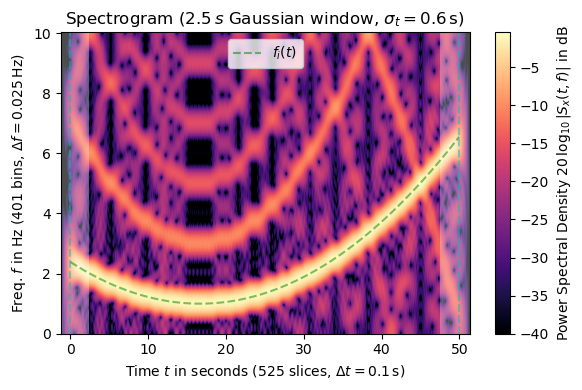

In [16]:
fig1, ax1 = plt.subplots(figsize=(6., 4.))  # enlarge plot a bit

t_lo, t_hi = SFT.extent(N)[:2]  # time range of plot
ax1.set_title(rf"Spectrogram ({SFT.m_num*SFT.T:g}$\,s$ Gaussian " +
              rf"window, $\sigma_t={g_std*SFT.T:g}\,$s)")
ax1.set(xlabel=f"Time $t$ in seconds ({SFT.p_num(N)} slices, " +
               rf"$\Delta t = {SFT.delta_t:g}\,$s)",
        ylabel=f"Freq. $f$ in Hz ({SFT.f_pts} bins, " +
               rf"$\Delta f = {SFT.delta_f:g}\,$Hz)",
        xlim=(t_lo, t_hi))

Sx_dB = 10 * np.log10(np.fmax(Sx2, 1e-4))  # limit range to -40 dB

im1 = ax1.imshow(Sx_dB, origin='lower', aspect='auto',
                 extent=SFT.extent(N), cmap='magma')
ax1.plot(t_x, f_i, 'g--', alpha=.5, label='$f_i(t)$')
fig1.colorbar(im1, label='Power Spectral Density ' +
                         r"$20\,\log_{10}|S_x(t, f)|$ in dB")

# Shade areas where window slices stick out to the side:

for t0_, t1_ in [(t_lo, SFT.lower_border_end[0] * SFT.T),
                 (SFT.upper_border_begin(N)[0] * SFT.T, t_hi)]:
    ax1.axvspan(t0_, t1_, color='w', linewidth=0, alpha=.3)

for t_ in [0, N * SFT.T]:  # mark signal borders with vertical line
    ax1.axvline(t_, color='c', linestyle='--', alpha=0.5)

ax1.legend()
fig1.tight_layout()

plt.show()


In [17]:
Sx2.shape

(401, 525)

In [18]:
SFT.f_pts

401

In [20]:
SFT.f

array([ 0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
        0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,
        1.   ,  1.025,  1.05 ,  1.075,  1.1  ,  1.125,  1.15 ,  1.175,
        1.2  ,  1.225,  1.25 ,  1.275,  1.3  ,  1.325,  1.35 ,  1.375,
        1.4  ,  1.425,  1.45 ,  1.475,  1.5  ,  1.525,  1.55 ,  1.575,
        1.6  ,  1.625,  1.65 ,  1.675,  1.7  ,  1.725,  1.75 ,  1.775,
        1.8  ,  1.825,  1.85 ,  1.875,  1.9  ,  1.925,  1.95 ,  1.975,
        2.   ,  2.025,  2.05 ,  2.075,  2.1  ,  2.125,  2.15 ,  2.175,
        2.2  ,  2.225,  2.25 ,  2.275,  2.3  ,  2.325,  2.35 ,  2.375,
        2.4  ,  2.425,  2.45 ,  2.475,  2.5  ,  2.525,  2.55 ,  2.575,
        2.6  ,  2.625,  2.65 ,  2.675,  2.7  ,  2.725,  2.75 ,  2.775,
      

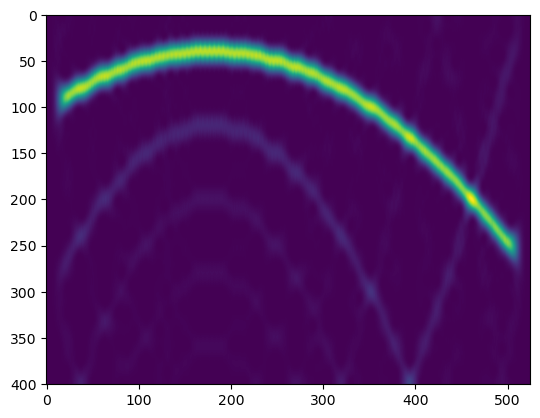

In [19]:
plt.imshow(Sx2)